**To do**
* read data from pkl

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../mlp-general")
from mlp import MLP

C:\Users\Liam\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
nn = MLP(3, [256, 256])
nn.load_data('../examples/ANN-input-data.csv', 'TRIMER', ['IP', 'EA', 'GAP'])
nn.fingerprint(bits=2048, rad=2, test_frac=0.3)

In [3]:
nn.build_network(dropout=0.4, input_dropout=0.8)

In [4]:
for i in range(10):
    nn.train(learning_rate=0.01, batch_size=32, epochs=10, optimizer='adam')
    y, pred = nn.evaluate()

Epoch 1/10
32173/32173 [==============================] - 20s 619us/step - loss: 0.2791
Epoch 2/10
32173/32173 [==============================] - 19s 602us/step - loss: 0.1606
Epoch 3/10
32173/32173 [==============================] - 19s 594us/step - loss: 0.1396
Epoch 4/10
32173/32173 [==============================] - 19s 593us/step - loss: 0.1261
Epoch 5/10
32173/32173 [==============================] - 19s 594us/step - loss: 0.1167
Epoch 6/10
32173/32173 [==============================] - 19s 594us/step - loss: 0.1091
Epoch 7/10
32173/32173 [==============================] - 20s 607us/step - loss: 0.1062
Epoch 8/10
32173/32173 [==============================] - 20s 617us/step - loss: 0.0995
Epoch 9/10
32173/32173 [==============================] - 19s 603us/step - loss: 0.0940
Epoch 10/10
32173/32173 [==============================] - 19s 598us/step - loss: 0.0914
_________________________________________________________________
Layer (type)                 Output Shape            


Model Evaluation
----------------
Mean Absolute Error: 0.09345
RMS Error : 0.1453

Epoch 1/10
32173/32173 [==============================] - 19s 603us/step - loss: 0.0508
Epoch 2/10
32173/32173 [==============================] - 19s 584us/step - loss: 0.0502
Epoch 3/10
32173/32173 [==============================] - 19s 599us/step - loss: 0.0499
Epoch 4/10
32173/32173 [==============================] - 19s 594us/step - loss: 0.0491
Epoch 5/10
32173/32173 [==============================] - 20s 635us/step - loss: 0.0486
Epoch 6/10
32173/32173 [==============================] - 20s 609us/step - loss: 0.0482
Epoch 7/10
32173/32173 [==============================] - 20s 616us/step - loss: 0.0485
Epoch 8/10
32173/32173 [==============================] - 20s 621us/step - loss: 0.0473
Epoch 9/10
32173/32173 [==============================] - 21s 639us/step - loss: 0.0470
Epoch 10/10
32173/32173 [==============================] - 20s 615us/step - loss: 0.0468
___________________________________

KeyboardInterrupt: 

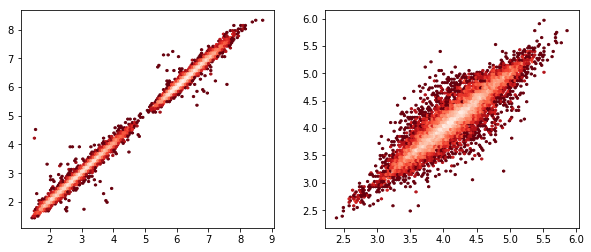

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pot_pred = np.vstack([pred[:,0], pred[:,1]])
gap_pred = pred[:,2]
pot_test = np.vstack([y[:,0], y[:,1]])
gap_test = y[:,2]

ax[0].hexbin(pot_pred, pot_test, mincnt=1, cmap='Reds_r', norm=LogNorm())
ax[1].hexbin(gap_pred, gap_test, mincnt=1, cmap='Reds_r', norm=LogNorm())
plt.show()